In [44]:
import numpy as np
import copy
import math 
import random
import matplotlib.pyplot as plt

In [40]:
def Sandpile_2D(size, crit_values, sand_types, trails, boundary_con = False, adding_method = "position", seed = 0):
    # basic sandpile model of given size (size by size matrix) with given critical value and trails
    # boundary_con is True walled model (sand is not removed) if False sand is removed from the sides
    # adding method; Where are the grains added using the add_sand function (position, random, normal)
    np.random.seed(seed)
    random.seed(seed)
    
    data = np.zeros(trails)
    Order = [-1, -2, -3, -4]
    A = np.zeros((size,size))
    Rep_3D = []
    for i in range(size):
        Rep_3D.append([])
        for j in range(size):
             Rep_3D[i].append([])
    
    for k in range(trails):
        # add sand to the model
        pos = add_sand(A, adding_method)
        Sand_type = np.random.randint(1,1 + sand_types)
        Rep_3D[pos[0]][pos[1]].append(Sand_type)
        
        # update the model simetaniously

        B = copy.deepcopy(A)
        avalage, control =  [0,0]
        while True:
            for i in range(0, len(A)):
                for j in range(0, len(A[0])):
                    if not Rep_3D[i][j]:
                        continue
                    
                    Temp_type = Rep_3D[i][j][-1]
                    if  A[i][j] - min(neigbours(B, [i,j])[0]) >= crit_values[Temp_type - 1] and B[i][j] >= 4:
                        
                        avalage += 1
                        # add to surrounding area
                        random.shuffle(Order)
                        itter = 0
                        for adj in range(-1, 2, 2):
                            if neigbours(A, [i,j])[1][itter] == 1:
                                A[i+ adj][j] += 1
                                Rep_3D[i+ adj][j].append(Rep_3D[i][j][Order[itter]])
                            itter += 1

                            if neigbours(A, [i,j])[1][itter] == 1:
                                A[i][j + adj] += 1
                                Rep_3D[i][j + adj].append(Rep_3D[i][j][Order[itter]])
                            itter += 1

                        # implement the boundary condition and lower the pile at critical value
                        if boundary_con == True:
                            A[i][j] -= sum(neigbours(A, [i,j])[1])
                            for r in range(sum(neigbours(A, [i,j])[1])):
                                Rep_3D[i][j].pop()
                        else:
                            A[i][j] -= 4
                            for r in range(4):
                                Rep_3D[i][j].pop()
            
            if control == avalage:
                data[k] = avalage
                break
                    
            control = avalage
                    
    return A, Rep_3D, data

In [4]:
def neigbours(Matrix, cord):
    # find the neibour values of a given cell
    # Returns the values and gives the neigbours that exist given the dataset
    # in order: left, upper, right and down neigbouring cells.
    
    neigbours = list()
    real = np.zeros(4)
    
    if cord[0] >= 1:
        neigbours.append(Matrix[cord[0] - 1][cord[1]])
        real[0] += 1
    if cord[1] >= 1:
        neigbours.append(Matrix[cord[0]][cord[1] - 1])
        real[1] += 1
    
    if cord[0] < len(Matrix) - 1:
        neigbours.append(Matrix[cord[0] + 1][cord[1]])
        real[2] += 1
    if cord[1] < len(Matrix) - 1:
        neigbours.append(Matrix[cord[0]][cord[1] + 1])
        real[3] += 1
        
    return neigbours, real

In [3]:
def add_sand(Matrix, method, cords = [-1, -1], std = -1):
    # add value to matrix using various methods'
    # position: at given postion standard is center
    # random: at random position
    # normal: at a normal distribution with given stanardard deviation around given position
    # standard postion is center and standard deviation is 1/6 th of the matrix size (3 SD intervall covers 99.9% of the matrix)
    
    if method.lower() == "random":
        randcords = [np.random.randint(len(Matrix) - 1), np.random.randint(len(Matrix[0]) - 1)]
        return randcords
    
    # set values of cordinates if no values are given
    if cords[0] == -1:
        cords[0] = math.floor(len(Matrix)/2)
    if cords[1] == -1:
        cords[1] = math.floor(len(Matrix)/2)
    
    if method.lower() == "position":
        Matrix[cords[0]][cords[1]] += 1
        return cords
    
    if method.lower() == "normal":
        # set value of standard deviation
        if std == -1:
            std = math.ceil(len(Matrix)/6)
        
        randcords = [np.random.normal(cords[0], std), np.random.normal(cords[1], std)]
        Matrix[randcords[0]][randcords[1]] += 1
        return randcords

In [5]:
Order = [-1, -2, -3, -4]
random.shuffle(Order)
Order

[-3, -1, -2, -4]

In [52]:
Matrix, C_Matrix, ava = Sandpile_2D(5, [4, 10], 2, 1000)

In [31]:
size = 5
Rep_3D = []
for i in range(size):
    Rep_3D.append([])
    for j in range(size):
        Rep_3D[i].append([])
        
Rep_3D[0][0]

[]

(array([6.432e+03, 1.012e+03, 6.520e+02, 4.900e+02, 3.640e+02, 2.890e+02,
        2.080e+02, 1.340e+02, 1.180e+02, 8.300e+01, 6.400e+01, 4.700e+01,
        2.900e+01, 1.900e+01, 1.800e+01, 1.300e+01, 1.100e+01, 4.000e+00,
        4.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <BarContainer object of 30 artists>)

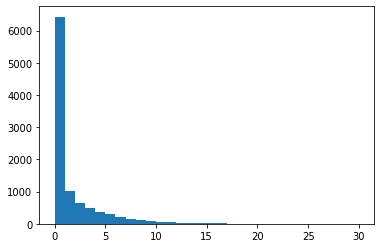

In [79]:
Matrix, C_Matrix, ava = Sandpile_2D(5, [4, 10], 2, 10000)
plt.hist(ava, bins=30, range = [0, 30])

(array([6.657e+03, 1.373e+03, 3.360e+02, 3.210e+02, 2.730e+02, 2.040e+02,
        1.780e+02, 1.110e+02, 9.000e+01, 8.600e+01, 7.200e+01, 5.500e+01,
        6.100e+01, 4.600e+01, 4.800e+01, 3.100e+01, 1.700e+01, 1.200e+01,
        6.000e+00, 1.000e+01, 4.000e+00, 3.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <BarContainer object of 30 artists>)

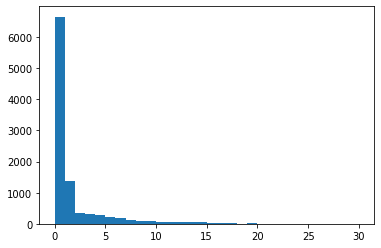

In [80]:
Matrix, C_Matrix, ava = Sandpile_2D(5, [4, 5], 2, 10000)
plt.hist(ava, bins=30, range = [0, 30])

(array([6.798e+03, 1.426e+03, 2.610e+02, 2.390e+02, 2.310e+02, 1.940e+02,
        1.760e+02, 9.100e+01, 8.500e+01, 9.000e+01, 1.190e+02, 6.000e+01,
        4.300e+01, 3.200e+01, 3.200e+01, 2.800e+01, 2.300e+01, 1.800e+01,
        1.000e+01, 1.500e+01, 1.200e+01, 4.000e+00, 4.000e+00, 3.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <BarContainer object of 30 artists>)

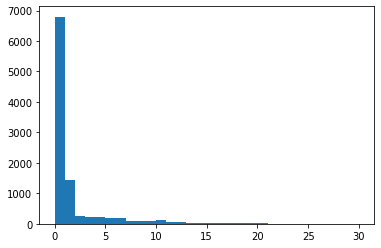

In [81]:
Matrix, C_Matrix, ava = Sandpile_2D(5, [9, 10], 2, 10000)
plt.hist(ava, bins=30, range = [0, 30])